# Assignment-04-Simple Linear Regression- Question 2


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("Salary_Data.csv")
df.head()
df.shape
df.isnull().sum() 
# There are no null values
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


## EDA (boxplot, scatterplot, histogram)


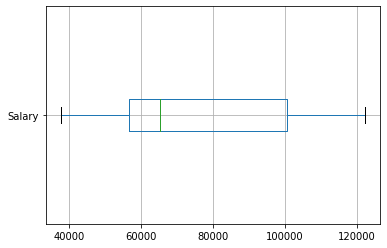

In [2]:
df.boxplot("Salary", vert=False)
plt.show()

In [3]:
Q1=np.percentile(df["Salary"],25)

In [4]:
Q3=np.percentile(df["Salary"],75)

In [5]:
IQR=Q3-Q1 # 43824

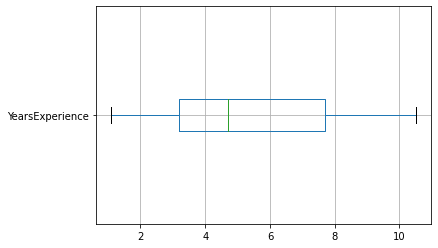

In [6]:
df.boxplot("YearsExperience", vert=False)
plt.show()

In [7]:
Q1=np.percentile(df["YearsExperience"],25)

In [8]:
Q3=np.percentile(df["YearsExperience"],75)

In [9]:
IQR=Q3-Q1 # 4.5

## There are no outliers and both the graphs are positively skewed


<AxesSubplot:xlabel='Salary', ylabel='YearsExperience'>

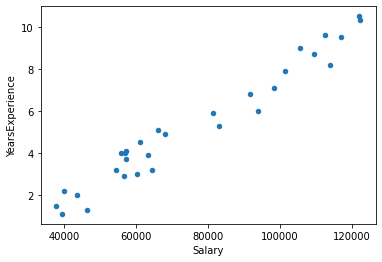

In [10]:
df.plot.scatter(x="Salary", y="YearsExperience")

<AxesSubplot:>

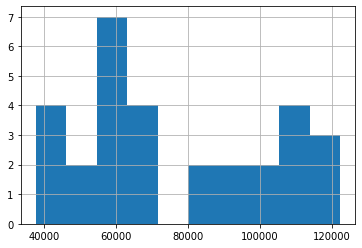

In [11]:
df["Salary"].hist()

<AxesSubplot:>

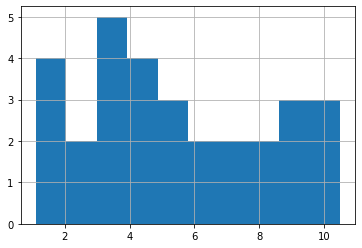

In [12]:
df["YearsExperience"].hist()

## Both the graphs are not bell shaped and the Salary graph has a gap but not the YearsExperience

In [13]:
df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


## Both variables are strong positively correlated and the correlation b/w the variables is 0.978242

## Splitting the variables


In [14]:
Y = df[["Salary"]]
X = df[["YearsExperience"]]

## Model fitting

## MODEL 1

In [15]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(X,Y)
y1 = LR.predict(X)

In [16]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(Y,y1)
# MSE = 31270951.7222

In [17]:
rmse = np.sqrt(mse).round(4)
# RMSE = 5592.0436

In [18]:
r2_score(Y,y1)
# r2score = 0.95695 (95%)

0.9569566641435086

## Transformations

## MODEL 2


In [19]:
from sklearn.linear_model import LinearRegression
LR=LinearRegression()
LR.fit(np.log(X),Y)
y1=LR.predict(np.log(X))

In [20]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(Y,y1)
# MSE = 106149618.7218

In [21]:
rmse = np.sqrt(mse).round(4)
# RMSE = 10302.8937

In [22]:
r2_score(Y,y1)
# r2score =  0.85388 (85%)

0.853888882875697

## create log-transformed data


Text(0.5, 1.0, 'Log-Transformed Data')

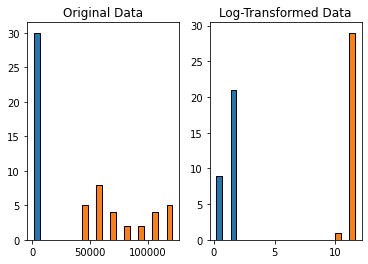

In [23]:
#create log-transformed data
df_log = np.log(df)
#define grid of plots
fig, axs = plt.subplots(nrows=1, ncols=2)
#create histograms
axs[0].hist(df, edgecolor='black')
axs[1].hist(df_log, edgecolor='black')
#add title to each histogram
axs[0].set_title('Original Data')
axs[1].set_title('Log-Transformed Data')

## MODEL 3


In [24]:
from sklearn.linear_model import LinearRegression
LR=LinearRegression()
LR.fit(np.sqrt(X),Y)
y1=LR.predict(np.sqrt(X))

In [25]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(Y,y1)
# MSE = 50127755.6165

In [26]:
rmse = np.sqrt(mse).round(4)
# RMSE = 7080.0957

In [27]:
r2_score(Y,y1)
# r2score = 0.93100 (93%)

0.9310009544993526

Text(0.5, 1.0, 'Square Root Transformed Data')

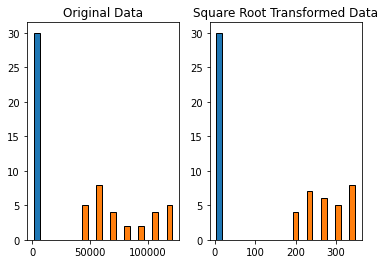

In [28]:
#create sqrt-transformed data
df_sqrt = np.sqrt(df)
#define grid of plots
fig, axs = plt.subplots(nrows=1, ncols=2)
#create histograms
axs[0].hist(df, edgecolor='black')
axs[1].hist(df_sqrt, edgecolor='black')
#add title to each histogram
axs[0].set_title('Original Data')
axs[1].set_title('Square Root Transformed Data')

## MODEL 4


In [29]:
from sklearn.linear_model import LinearRegression
LR=LinearRegression()
LR.fit(X**2,Y)
y1=LR.predict(X**2)

In [30]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(Y,y1)
# MSE = 61520040.4605

In [31]:
rmse = np.sqrt(mse).round(4)
# RMSE = 7843.4712

In [32]:
r2_score(Y,y1)
# r2score =  0.91531 (91%)

0.9153198857852564

Text(0.5, 1.0, 'Cube Root Transformed Data')

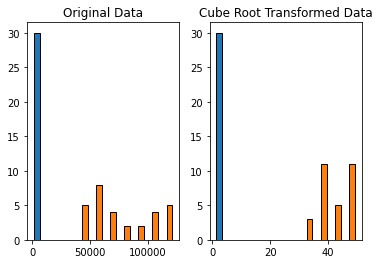

In [33]:
#create cbrt-transformed data
df_cbrt = np.cbrt(df)
#define grid of plots
fig, axs = plt.subplots(nrows=1, ncols=2)
#create histograms
axs[0].hist(df, edgecolor='black')
axs[1].hist(df_cbrt, edgecolor='black')
#add title to each histogram
axs[0].set_title('Original Data')
axs[1].set_title('Cube Root Transformed Data')

## Inference : A prediction model is built and the best model selected is model 1 since its r2score is 95%
